So far, we have use a mixture of libraries: numpy, scipy and matplotlib to build, training and analyse our models. 

Tensorflow and Pytorch deep learning frameworks which do much of the heavy lifting. E.g. we do not need to implement our own optimisation routine with these frameworks. Much boilerplat code is also available in there respective ecosystems 

Generally speaking, Pytorch lends itself well to apply DL to Natural Langauge Processing whereas Tensorflow is more suited for computer vision and non-euclidean data structures; social network graphs etc. 

In [46]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
import warnings
from IPython.core.interactiveshell import InteractiveShell
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"
tf.random.set_seed(1)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


We will use the **functional API** of Keras; Tensorflow's  medium to high level API for building computational graphs. 

**NOTE**
If I were you I would avoid using the *sequential* method for constructing the graphs in Keras. Instead use the functional API. 

_Why?_ 

You may want to add inputs into a network that are inputted **after** the first layer; you cannot do this with the [sequential class](https://keras.io/api/models/sequential/). Hence, use the [functional one](https://keras.io/guides/functional_api/)

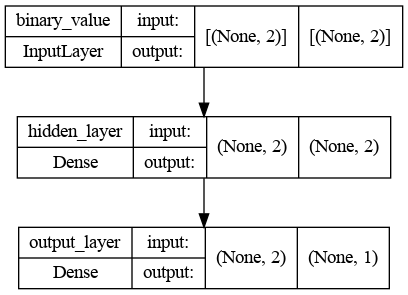

Model: "XOR_Gate_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 binary_value (InputLayer)   [(None, 2)]               0         
                                                                 
 hidden_layer (Dense)        (None, 2)                 6         
                                                                 
 output_layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [59]:
def construct_model(model_name="XOR_Gate_model"):
    input_nodes = keras.Input(shape=(2,), name="binary_value")
    dense_hidden = layers.Dense(units=2, activation="relu", name="hidden_layer")(input_nodes)
    output = layers.Dense(units=1, activation="relu", name="output_layer")(dense_hidden)
       
    return keras.Model(inputs=input_nodes,
                       outputs=output,
                       name=model_name)

model = construct_model()
model_name="XOR_Gate_model"
keras.utils.plot_model(model,
                       f"media/{model_name}_diagram.png",
                      show_shapes=True)

model.summary()

In [60]:

LR = 0.001
def compile_model(model):
    optimizer = keras.optimizers.RMSprop(learning_rate=LR)
    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])
    return model 

M = compile_model(model)

Setting up the training routine in TF. 

In [63]:
MAX_EPOCHS = 3000

X = tf.constant([[1, 1],
                 [0, 1],
                 [1,0],
                 [0,0]])

Yxor = tf.constant( [
    [0],
    [1],
    [1],
    [0]
    ])

result = M.fit(X, Yxor, epochs=MAX_EPOCHS, verbose=1)


Epoch 1/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.1298 - mae: 0.3602 - mse: 0.1298
Epoch 2/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.1295 - mae: 0.3598 - mse: 0.1295
Epoch 3/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.1292 - mae: 0.3594 - mse: 0.1292
Epoch 4/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.1289 - mae: 0.3590 - mse: 0.1289
Epoch 5/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.1286 - mae: 0.3586 - mse: 0.1286
Epoch 6/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.1283 - mae: 0.3582 - mse: 0.1283
Epoch 7/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.1280 - mae: 0.3577 - mse: 0.1280
Epoch 8/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.1277 - mae: 0.3573 - mse: 0.1277
Epoch 9/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.1274 - mae: 0.3569 - mse: 0.1274
Epoch 10/3000
1/1 [===========

1/1 [==============================] - 0s 11ms/step - loss: 0.0907 - mae: 0.3012 - mse: 0.0907
Epoch 151/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0905 - mae: 0.3008 - mse: 0.0905
Epoch 152/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0903 - mae: 0.3004 - mse: 0.0903
Epoch 153/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.0901 - mae: 0.3001 - mse: 0.0901
Epoch 154/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0898 - mae: 0.2997 - mse: 0.0898
Epoch 155/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0896 - mae: 0.2994 - mse: 0.0896
Epoch 156/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0894 - mae: 0.2989 - mse: 0.0894
Epoch 157/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0892 - mae: 0.2986 - mse: 0.0892
Epoch 158/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0889 - mae: 0.2982 - mse: 0.0889
Epoch 159/3000
1/1 [=======

1/1 [==============================] - 0s 14ms/step - loss: 0.0591 - mae: 0.2431 - mse: 0.0591
Epoch 299/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.0590 - mae: 0.2429 - mse: 0.0590
Epoch 300/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0587 - mae: 0.2423 - mse: 0.0587
Epoch 301/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0586 - mae: 0.2420 - mse: 0.0586
Epoch 302/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0584 - mae: 0.2415 - mse: 0.0584
Epoch 303/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0582 - mae: 0.2412 - mse: 0.0582
Epoch 304/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.0580 - mae: 0.2407 - mse: 0.0580
Epoch 305/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.0578 - mae: 0.2403 - mse: 0.0578
Epoch 306/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.0576 - mae: 0.2399 - mse: 0.0576
Epoch 307/3000
1/1 [======

1/1 [==============================] - 0s 14ms/step - loss: 0.0320 - mae: 0.1789 - mse: 0.0320
Epoch 447/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0320 - mae: 0.1787 - mse: 0.0320
Epoch 448/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.0317 - mae: 0.1780 - mse: 0.0317
Epoch 449/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0316 - mae: 0.1778 - mse: 0.0316
Epoch 450/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.0314 - mae: 0.1772 - mse: 0.0314
Epoch 451/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.0313 - mae: 0.1768 - mse: 0.0313
Epoch 452/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.0311 - mae: 0.1763 - mse: 0.0311
Epoch 453/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.0310 - mae: 0.1759 - mse: 0.0310
Epoch 454/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.0308 - mae: 0.1754 - mse: 0.0308
Epoch 455/3000
1/1 [======

1/1 [==============================] - 0s 14ms/step - loss: 0.0121 - mae: 0.1098 - mse: 0.0121
Epoch 595/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0120 - mae: 0.1094 - mse: 0.0120
Epoch 596/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.0119 - mae: 0.1089 - mse: 0.0119
Epoch 597/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0118 - mae: 0.1084 - mse: 0.0118
Epoch 598/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0117 - mae: 0.1080 - mse: 0.0117
Epoch 599/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.0116 - mae: 0.1074 - mse: 0.0116
Epoch 600/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0115 - mae: 0.1070 - mse: 0.0115
Epoch 601/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.0114 - mae: 0.1064 - mse: 0.0114
Epoch 602/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0113 - mae: 0.1061 - mse: 0.0113
Epoch 603/3000
1/1 [===========

1/1 [==============================] - 0s 12ms/step - loss: 0.0015 - mae: 0.0387 - mse: 0.0015
Epoch 745/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.0015 - mae: 0.0383 - mse: 0.0015
Epoch 746/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.0014 - mae: 0.0379 - mse: 0.0014
Epoch 747/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.0014 - mae: 0.0373 - mse: 0.0014
Epoch 748/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.0014 - mae: 0.0371 - mse: 0.0014
Epoch 749/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.0014 - mae: 0.0364 - mse: 0.0014
Epoch 750/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0014 - mae: 0.0363 - mse: 0.0014
Epoch 751/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0013 - mae: 0.0355 - mse: 0.0013
Epoch 752/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0013 - mae: 0.0355 - mse: 0.0013
Epoch 753/3000
1/1 [==========

1/1 [==============================] - 0s 4ms/step - loss: 4.6029e-07 - mae: 5.1462e-04 - mse: 4.6029e-07
Epoch 885/3000
1/1 [==============================] - 0s 4ms/step - loss: 3.8521e-07 - mae: 4.0062e-04 - mse: 3.8521e-07
Epoch 886/3000
1/1 [==============================] - 0s 4ms/step - loss: 3.3977e-07 - mae: 4.6383e-04 - mse: 3.3977e-07
Epoch 887/3000
1/1 [==============================] - 0s 3ms/step - loss: 2.6262e-07 - mae: 3.3948e-04 - mse: 2.6262e-07
Epoch 888/3000
1/1 [==============================] - 0s 3ms/step - loss: 2.6786e-07 - mae: 4.3462e-04 - mse: 2.6786e-07
Epoch 889/3000
1/1 [==============================] - 0s 4ms/step - loss: 2.1893e-07 - mae: 3.2866e-04 - mse: 2.1893e-07
Epoch 890/3000
1/1 [==============================] - 0s 3ms/step - loss: 1.9663e-07 - mae: 3.7785e-04 - mse: 1.9663e-07
Epoch 891/3000
1/1 [==============================] - 0s 4ms/step - loss: 2.3183e-07 - mae: 3.7807e-04 - mse: 2.3183e-07
Epoch 892/3000
1/1 [===========================

1/1 [==============================] - 0s 8ms/step - loss: 1.7087e-06 - mae: 8.7154e-04 - mse: 1.7087e-06
Epoch 1021/3000
1/1 [==============================] - 0s 9ms/step - loss: 2.8325e-06 - mae: 0.0011 - mse: 2.8325e-06
Epoch 1022/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.0143e-06 - mae: 0.0015 - mse: 5.0143e-06
Epoch 1023/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.6312e-06 - mae: 0.0020 - mse: 8.6312e-06
Epoch 1024/3000
1/1 [==============================] - 0s 12ms/step - loss: 1.2633e-05 - mae: 0.0025 - mse: 1.2633e-05
Epoch 1025/3000
1/1 [==============================] - 0s 11ms/step - loss: 1.4448e-05 - mae: 0.0025 - mse: 1.4448e-05
Epoch 1026/3000
1/1 [==============================] - 0s 8ms/step - loss: 1.1656e-05 - mae: 0.0024 - mse: 1.1656e-05
Epoch 1027/3000
1/1 [==============================] - 0s 8ms/step - loss: 8.2687e-06 - mae: 0.0019 - mse: 8.2687e-06
Epoch 1028/3000
1/1 [==============================] - 0s 10ms/s

1/1 [==============================] - 0s 7ms/step - loss: 5.8526e-06 - mae: 0.0016 - mse: 5.8526e-06
Epoch 1159/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8569e-06 - mae: 0.0016 - mse: 5.8569e-06
Epoch 1160/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8569e-06 - mae: 0.0016 - mse: 5.8569e-06
Epoch 1161/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8598e-06 - mae: 0.0016 - mse: 5.8598e-06
Epoch 1162/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8576e-06 - mae: 0.0016 - mse: 5.8576e-06
Epoch 1163/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8595e-06 - mae: 0.0016 - mse: 5.8595e-06
Epoch 1164/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8559e-06 - mae: 0.0016 - mse: 5.8559e-06
Epoch 1165/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8563e-06 - mae: 0.0016 - mse: 5.8563e-06
Epoch 1166/3000
1/1 [==============================] - 0s 7ms/step - los

1/1 [==============================] - 0s 5ms/step - loss: 5.8535e-06 - mae: 0.0016 - mse: 5.8535e-06
Epoch 1297/3000
1/1 [==============================] - 0s 5ms/step - loss: 5.8556e-06 - mae: 0.0016 - mse: 5.8556e-06
Epoch 1298/3000
1/1 [==============================] - 0s 4ms/step - loss: 5.8514e-06 - mae: 0.0016 - mse: 5.8514e-06
Epoch 1299/3000
1/1 [==============================] - 0s 5ms/step - loss: 5.8538e-06 - mae: 0.0016 - mse: 5.8538e-06
Epoch 1300/3000
1/1 [==============================] - 0s 5ms/step - loss: 5.8506e-06 - mae: 0.0016 - mse: 5.8506e-06
Epoch 1301/3000
1/1 [==============================] - 0s 5ms/step - loss: 5.8533e-06 - mae: 0.0016 - mse: 5.8533e-06
Epoch 1302/3000
1/1 [==============================] - 0s 5ms/step - loss: 5.8504e-06 - mae: 0.0016 - mse: 5.8504e-06
Epoch 1303/3000
1/1 [==============================] - 0s 5ms/step - loss: 5.8532e-06 - mae: 0.0016 - mse: 5.8532e-06
Epoch 1304/3000
1/1 [==============================] - 0s 6ms/step - los

1/1 [==============================] - 0s 13ms/step - loss: 5.8487e-06 - mae: 0.0016 - mse: 5.8487e-06
Epoch 1435/3000
1/1 [==============================] - 0s 16ms/step - loss: 5.8511e-06 - mae: 0.0016 - mse: 5.8511e-06
Epoch 1436/3000
1/1 [==============================] - 0s 17ms/step - loss: 5.8474e-06 - mae: 0.0016 - mse: 5.8474e-06
Epoch 1437/3000
1/1 [==============================] - 0s 18ms/step - loss: 5.8501e-06 - mae: 0.0016 - mse: 5.8501e-06
Epoch 1438/3000
1/1 [==============================] - 0s 14ms/step - loss: 5.8476e-06 - mae: 0.0016 - mse: 5.8476e-06
Epoch 1439/3000
1/1 [==============================] - 0s 14ms/step - loss: 5.8511e-06 - mae: 0.0016 - mse: 5.8511e-06
Epoch 1440/3000
1/1 [==============================] - 0s 17ms/step - loss: 5.8492e-06 - mae: 0.0016 - mse: 5.8492e-06
Epoch 1441/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.8526e-06 - mae: 0.0016 - mse: 5.8526e-06
Epoch 1442/3000
1/1 [==============================] - 0s 14ms/s

1/1 [==============================] - 0s 14ms/step - loss: 5.8487e-06 - mae: 0.0016 - mse: 5.8487e-06
Epoch 1573/3000
1/1 [==============================] - 0s 15ms/step - loss: 5.8518e-06 - mae: 0.0016 - mse: 5.8518e-06
Epoch 1574/3000
1/1 [==============================] - 0s 11ms/step - loss: 5.8479e-06 - mae: 0.0016 - mse: 5.8479e-06
Epoch 1575/3000
1/1 [==============================] - 0s 17ms/step - loss: 5.8503e-06 - mae: 0.0016 - mse: 5.8503e-06
Epoch 1576/3000
1/1 [==============================] - 0s 18ms/step - loss: 5.8469e-06 - mae: 0.0016 - mse: 5.8469e-06
Epoch 1577/3000
1/1 [==============================] - 0s 15ms/step - loss: 5.8498e-06 - mae: 0.0016 - mse: 5.8498e-06
Epoch 1578/3000
1/1 [==============================] - 0s 18ms/step - loss: 5.8470e-06 - mae: 0.0016 - mse: 5.8470e-06
Epoch 1579/3000
1/1 [==============================] - 0s 12ms/step - loss: 5.8505e-06 - mae: 0.0016 - mse: 5.8505e-06
Epoch 1580/3000
1/1 [==============================] - 0s 11ms/s

Epoch 1641/3000
1/1 [==============================] - 0s 19ms/step - loss: 5.8508e-06 - mae: 0.0016 - mse: 5.8508e-06
Epoch 1642/3000
1/1 [==============================] - 0s 13ms/step - loss: 5.8485e-06 - mae: 0.0016 - mse: 5.8485e-06
Epoch 1643/3000
1/1 [==============================] - 0s 17ms/step - loss: 5.8523e-06 - mae: 0.0016 - mse: 5.8523e-06
Epoch 1644/3000
1/1 [==============================] - 0s 17ms/step - loss: 5.8489e-06 - mae: 0.0016 - mse: 5.8489e-06
Epoch 1645/3000
1/1 [==============================] - 0s 16ms/step - loss: 5.8510e-06 - mae: 0.0016 - mse: 5.8510e-06
Epoch 1646/3000
1/1 [==============================] - 0s 15ms/step - loss: 5.8470e-06 - mae: 0.0016 - mse: 5.8470e-06
Epoch 1647/3000
1/1 [==============================] - 0s 12ms/step - loss: 5.8492e-06 - mae: 0.0016 - mse: 5.8492e-06
Epoch 1648/3000
1/1 [==============================] - 0s 18ms/step - loss: 5.8461e-06 - mae: 0.0016 - mse: 5.8461e-06
Epoch 1649/3000
1/1 [===========================

1/1 [==============================] - 0s 7ms/step - loss: 5.8479e-06 - mae: 0.0016 - mse: 5.8479e-06
Epoch 1780/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8445e-06 - mae: 0.0016 - mse: 5.8445e-06
Epoch 1781/3000
1/1 [==============================] - 0s 8ms/step - loss: 5.8473e-06 - mae: 0.0016 - mse: 5.8473e-06
Epoch 1782/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8448e-06 - mae: 0.0016 - mse: 5.8448e-06
Epoch 1783/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8482e-06 - mae: 0.0016 - mse: 5.8482e-06
Epoch 1784/3000
1/1 [==============================] - 0s 8ms/step - loss: 5.8454e-06 - mae: 0.0016 - mse: 5.8454e-06
Epoch 1785/3000
1/1 [==============================] - 0s 8ms/step - loss: 5.8479e-06 - mae: 0.0016 - mse: 5.8479e-06
Epoch 1786/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8440e-06 - mae: 0.0016 - mse: 5.8440e-06
Epoch 1787/3000
1/1 [==============================] - 0s 7ms/step - los

1/1 [==============================] - 0s 6ms/step - loss: 5.8472e-06 - mae: 0.0016 - mse: 5.8472e-06
Epoch 1918/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8437e-06 - mae: 0.0016 - mse: 5.8437e-06
Epoch 1919/3000
1/1 [==============================] - 0s 8ms/step - loss: 5.8458e-06 - mae: 0.0016 - mse: 5.8458e-06
Epoch 1920/3000
1/1 [==============================] - 0s 8ms/step - loss: 5.8426e-06 - mae: 0.0016 - mse: 5.8426e-06
Epoch 1921/3000
1/1 [==============================] - 0s 8ms/step - loss: 5.8456e-06 - mae: 0.0016 - mse: 5.8456e-06
Epoch 1922/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8428e-06 - mae: 0.0016 - mse: 5.8428e-06
Epoch 1923/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8461e-06 - mae: 0.0016 - mse: 5.8461e-06
Epoch 1924/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8423e-06 - mae: 0.0016 - mse: 5.8423e-06
Epoch 1925/3000
1/1 [==============================] - 0s 7ms/step - los

1/1 [==============================] - 0s 6ms/step - loss: 5.8464e-06 - mae: 0.0016 - mse: 5.8464e-06
Epoch 2056/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8435e-06 - mae: 0.0016 - mse: 5.8435e-06
Epoch 2057/3000
1/1 [==============================] - 0s 5ms/step - loss: 5.8457e-06 - mae: 0.0016 - mse: 5.8457e-06
Epoch 2058/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8417e-06 - mae: 0.0016 - mse: 5.8417e-06
Epoch 2059/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8439e-06 - mae: 0.0016 - mse: 5.8439e-06
Epoch 2060/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8401e-06 - mae: 0.0016 - mse: 5.8401e-06
Epoch 2061/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8428e-06 - mae: 0.0016 - mse: 5.8428e-06
Epoch 2062/3000
1/1 [==============================] - 0s 5ms/step - loss: 5.8391e-06 - mae: 0.0016 - mse: 5.8391e-06
Epoch 2063/3000
1/1 [==============================] - 0s 6ms/step - los

1/1 [==============================] - 0s 7ms/step - loss: 5.8440e-06 - mae: 0.0016 - mse: 5.8440e-06
Epoch 2194/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8415e-06 - mae: 0.0016 - mse: 5.8415e-06
Epoch 2195/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8439e-06 - mae: 0.0016 - mse: 5.8439e-06
Epoch 2196/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8404e-06 - mae: 0.0016 - mse: 5.8404e-06
Epoch 2197/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8428e-06 - mae: 0.0016 - mse: 5.8428e-06
Epoch 2198/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8390e-06 - mae: 0.0016 - mse: 5.8390e-06
Epoch 2199/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8418e-06 - mae: 0.0016 - mse: 5.8418e-06
Epoch 2200/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8388e-06 - mae: 0.0016 - mse: 5.8388e-06
Epoch 2201/3000
1/1 [==============================] - 0s 7ms/step - los

1/1 [==============================] - 0s 7ms/step - loss: 5.8400e-06 - mae: 0.0016 - mse: 5.8400e-06
Epoch 2332/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8373e-06 - mae: 0.0016 - mse: 5.8373e-06
Epoch 2333/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8410e-06 - mae: 0.0016 - mse: 5.8410e-06
Epoch 2334/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8386e-06 - mae: 0.0016 - mse: 5.8386e-06
Epoch 2335/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8425e-06 - mae: 0.0016 - mse: 5.8425e-06
Epoch 2336/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8397e-06 - mae: 0.0016 - mse: 5.8397e-06
Epoch 2337/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8421e-06 - mae: 0.0016 - mse: 5.8421e-06
Epoch 2338/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8379e-06 - mae: 0.0016 - mse: 5.8379e-06
Epoch 2339/3000
1/1 [==============================] - 0s 6ms/step - los

1/1 [==============================] - 0s 5ms/step - loss: 5.8377e-06 - mae: 0.0016 - mse: 5.8377e-06
Epoch 2470/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8338e-06 - mae: 0.0016 - mse: 5.8338e-06
Epoch 2471/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8369e-06 - mae: 0.0016 - mse: 5.8369e-06
Epoch 2472/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8340e-06 - mae: 0.0016 - mse: 5.8340e-06
Epoch 2473/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8378e-06 - mae: 0.0016 - mse: 5.8378e-06
Epoch 2474/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8362e-06 - mae: 0.0016 - mse: 5.8362e-06
Epoch 2475/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8405e-06 - mae: 0.0016 - mse: 5.8405e-06
Epoch 2476/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8382e-06 - mae: 0.0016 - mse: 5.8382e-06
Epoch 2477/3000
1/1 [==============================] - 0s 6ms/step - los

1/1 [==============================] - 0s 7ms/step - loss: 5.8378e-06 - mae: 0.0016 - mse: 5.8378e-06
Epoch 2608/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8349e-06 - mae: 0.0016 - mse: 5.8349e-06
Epoch 2609/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8371e-06 - mae: 0.0016 - mse: 5.8371e-06
Epoch 2610/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8334e-06 - mae: 0.0016 - mse: 5.8334e-06
Epoch 2611/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8357e-06 - mae: 0.0016 - mse: 5.8357e-06
Epoch 2612/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8325e-06 - mae: 0.0016 - mse: 5.8325e-06
Epoch 2613/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8362e-06 - mae: 0.0016 - mse: 5.8362e-06
Epoch 2614/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8339e-06 - mae: 0.0016 - mse: 5.8339e-06
Epoch 2615/3000
1/1 [==============================] - 0s 7ms/step - los

1/1 [==============================] - 0s 6ms/step - loss: 5.8360e-06 - mae: 0.0016 - mse: 5.8360e-06
Epoch 2746/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8334e-06 - mae: 0.0016 - mse: 5.8334e-06
Epoch 2747/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8367e-06 - mae: 0.0016 - mse: 5.8367e-06
Epoch 2748/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8333e-06 - mae: 0.0016 - mse: 5.8333e-06
Epoch 2749/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8365e-06 - mae: 0.0016 - mse: 5.8365e-06
Epoch 2750/3000
1/1 [==============================] - 0s 7ms/step - loss: 5.8330e-06 - mae: 0.0016 - mse: 5.8330e-06
Epoch 2751/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8354e-06 - mae: 0.0016 - mse: 5.8354e-06
Epoch 2752/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.8312e-06 - mae: 0.0016 - mse: 5.8312e-06
Epoch 2753/3000
1/1 [==============================] - 0s 6ms/step - los

1/1 [==============================] - 0s 6ms/step - loss: 7.6910e-08 - mae: 1.8500e-04 - mse: 7.6910e-08
Epoch 2881/3000
1/1 [==============================] - 0s 8ms/step - loss: 1.1829e-07 - mae: 2.2942e-04 - mse: 1.1829e-07
Epoch 2882/3000
1/1 [==============================] - 0s 7ms/step - loss: 2.1796e-07 - mae: 3.1146e-04 - mse: 2.1796e-07
Epoch 2883/3000
1/1 [==============================] - 0s 7ms/step - loss: 4.7614e-07 - mae: 4.6033e-04 - mse: 4.7614e-07
Epoch 2884/3000
1/1 [==============================] - 0s 7ms/step - loss: 1.2098e-06 - mae: 7.3379e-04 - mse: 1.2098e-06
Epoch 2885/3000
1/1 [==============================] - 0s 8ms/step - loss: 3.4254e-06 - mae: 0.0012 - mse: 3.4254e-06
Epoch 2886/3000
1/1 [==============================] - 0s 8ms/step - loss: 9.6139e-06 - mae: 0.0021 - mse: 9.6139e-06
Epoch 2887/3000
1/1 [==============================] - 0s 7ms/step - loss: 2.0278e-05 - mae: 0.0032 - mse: 2.0278e-05
Epoch 2888/3000
1/1 [==============================]

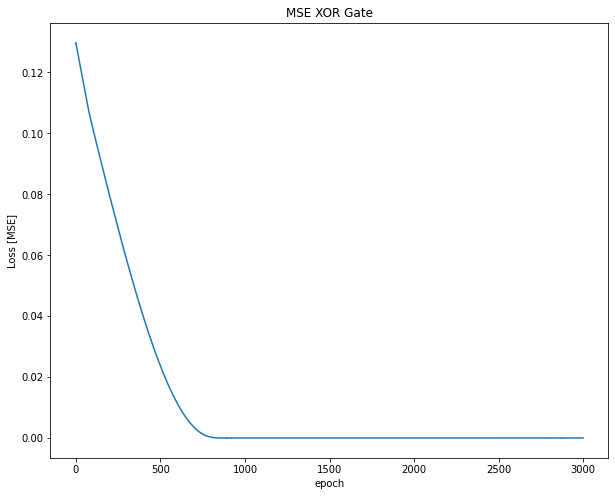

In [64]:
def plot_training_loss_hist(hist):
    fig = plt.figure(figsize=(10,8))
    plt.plot(hist['loss'])
    plt.title('MSE XOR Gate')
    plt.ylabel('Loss [MSE]')
    plt.xlabel('epoch')
    plt.show()
plot_training_loss_hist(result.history)

In [66]:
clf = result.model
clf.predict(X)

array([[0.       ],
       [1.0021088],
       [1.0043516],
       [0.       ]], dtype=float32)